In [3]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv("fraud_reduced.csv", index_col=0)

X = df.drop("Class", axis=1)
y = df["Class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.33, stratify=y)



In [6]:

param_grid = {
    'n_estimators': [70],
    'learning_rate': [1],
    'algorithm': ['SAMME.R']
}

rnd_clf = AdaBoostClassifier()
param_search = GridSearchCV(
    rnd_clf,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=None),  # Cross-validation strategy
    n_jobs=1,  # Use all available CPU cores
    scoring = make_scorer(f1_score),
    verbose=2
)



param_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=70; total time=  26.3s
[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=70; total time=  26.3s
[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=70; total time=  26.1s
[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=70; total time=  26.7s
[CV] END algorithm=SAMME.R, learning_rate=1, n_estimators=70; total time=  27.0s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'algorithm': ['SAMME.R'], 'learning_rate': [1],
                         'n_estimators': [70]},
             scoring=make_scorer(f1_score), verbose=2)

In [7]:
param_search.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 70}

In [8]:
cvres = param_search.cv_results_
results = [(mean_score, params) for mean_score, params in zip(cvres["mean_test_score"], cvres["params"])]
results.sort(reverse=True, key=lambda x: x[0])
for mean_score, params in results:
    print("ROC AUC", mean_score, "-", "Parameters:", params)

ROC AUC 0.7506805106209754 - Parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 70}


In [ ]:
param_search.best_estimator_

AdaBoostClassifier(learning_rate=1, n_estimators=70)

In [ ]:
clf_ada = param_search.best_estimator_

In [ ]:
y_pred = clf_ada.predict(X_test)

[[92387  1438]
 [   24   138]]


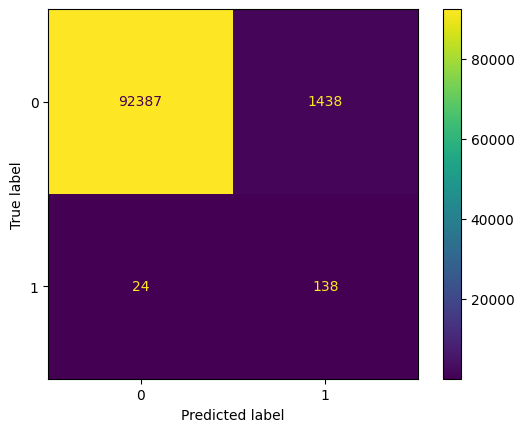

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_ada.classes_)
disp.plot()

In [ ]:
y_pred = clf_ada.predict(X_test)

# Calculate and display classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

c:\Users\gasto\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     93825
           1       0.09      0.85      0.16       162

    accuracy                           0.98     93987
   macro avg       0.54      0.92      0.58     93987
weighted avg       1.00      0.98      0.99     93987



In [ ]:
import joblib

joblib.dump(value= clf_ada, filename='AdaBoost.pkl')

['AdaBoost.pkl']